In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import scipy.stats as st
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_ind
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

**Задание "Предсказание утечки кадров"**

**Признаки:**
1. satisfaction_level​ - Уровень удовлетворенности работой 
2.Last_evaluation ​- Время с момента последней оценки в годах 
3. number_projects​ - Количество проектов, выполненных за время работы 
4. average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц 
5. time_spend_company​ - Стаж работы в компании в годах 
6. work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником 
7. left​ - уволился ли сотрудник 
8. promotion_last_5years​ - повышался ли сотрудник за последние пять лет 
9. department ​- отдел в котором работает сотр

In [2]:
df = pd.read_csv('HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
### проверим на наличие пропусков
print((df.isna().mean() * 100).round(2))

### расчитаем основные метрики 
df.describe().round(2)

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
department               0.0
salary                   0.0
dtype: float64


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00,14999.00
mean,0.61,0.72,3.80,201.05,3.50,0.14,0.24,0.02
std,0.25,0.17,1.23,49.94,1.46,0.35,0.43,0.14
min,0.09,0.36,2.00,96.00,2.00,0.00,0.00,0.00
25%,0.44,0.56,3.00,156.00,3.00,0.00,0.00,0.00
50%,0.64,0.72,4.00,200.00,3.00,0.00,0.00,0.00
75%,0.82,0.87,5.00,245.00,4.00,0.00,0.00,0.00
max,1.00,1.00,7.00,310.00,10.00,1.00,1.00,1.00


In [4]:
### перед расчетом корреляций попробуем привести зарплаты к числовому значению, чтобы проверить корреляцию в том числе с ЗП
### на наши данные это негативным образом не повлияет, но может дать дополнительную информацию
df.loc[df.salary=='low', 'salary'] = 0.33
df.loc[df.salary=='medium', 'salary'] = 0.66
df.loc[df.salary=='high', 'salary'] = 0.99
df.salary = df.salary.astype(float)
df.corr().round(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03,0.05
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01,-0.00
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07,0.05
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04,0.01
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06,-0.16
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00,0.10
salary,0.05,-0.01,-0.00,-0.00,0.05,0.01,-0.16,0.10,1.00


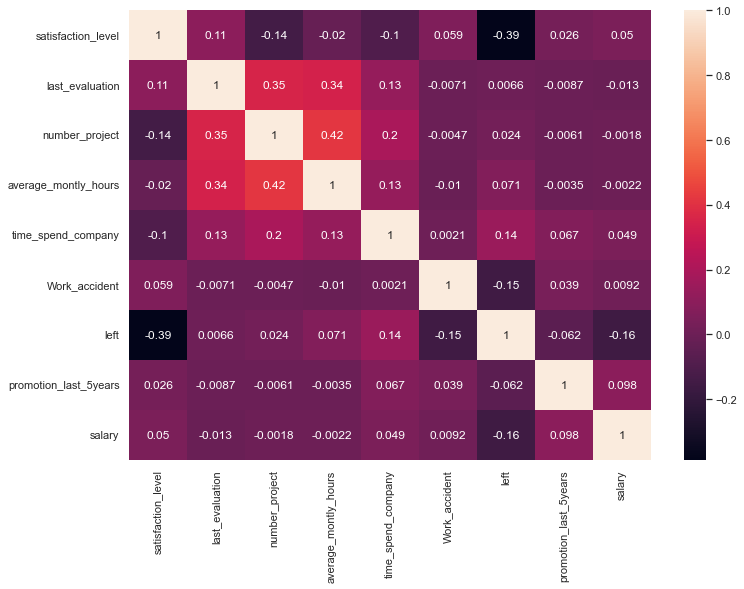

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.corr(), annot=True);

In [6]:
### В нашем случае можно было бы делать отбор самых коррелируемых с помощью тепловой карты 
### Но здесь предпримем достаточно топорную попытку сделать механизм отбора 2 самых скоррелированных и нескоррелированных параметров
### предположу, что имеет смысл округлить значения менее 0.01, а получившиеся нулевые корреляции отбросить


c = df.corr().abs().unstack().sort_values(kind = 'quicksort').round(2)
d = pd.DataFrame(df.corr().abs().unstack().sort_values(kind = 'quicksort').round(2)).reset_index()
l=[]
[l.append(index) for index,i in enumerate(list(c)) if i !=0 and i!=1]
        
### тут будет выведен лишь модуль корреляций
print('Наименее коррелирующие пары:', *d.iloc[l[1]],'и',*d.iloc[l[3]])        
print('Наиболее коррелирующие пары:',*d.iloc[l[-1]],'и',*d.iloc[l[-3]])

### в данном случае наиболее коррилируют пары: average_montly_hours-number_project = 0.42 и satisfaction_level-left = -0.39(отрицательная корреляция)
### наименее всего коррелируют promotion_last_5years-number_project = -0.01 и left last_evaluation = 0.01

Наименее коррелирующие пары: promotion_last_5years number_project 0.01 и left last_evaluation 0.01
Наиболее коррелирующие пары: average_montly_hours number_project 0.42 и satisfaction_level left 0.39


1. Таким образом, можно отметить отрицательную корреляцию в -0.39 между уровнем удовлетворенности и увольнениями - чем менее доволен, тем чаще увольняются. 
2. Можно также отметить положительную корреляцию в 0.42 между количеством проектов и проведенными за работой часами 

In [7]:
### проверим среднее значение по увольнениям по разным ЗП
print('Средняя ЗП для сотрудников с высокой ЗП:',round(df[df.salary==0.99].left.mean(),3))
print('Средняя ЗП для сотрудников со средней ЗП:',round(df[df.salary==0.66].left.mean(),3))
print('Средняя ЗП для сотрудников с низкой ЗП:',round(df[df.salary==0.33].left.mean(),3))
### вернем ЗП к прежнему виду
df.loc[df.salary==0.33, 'salary'] = 'low'
df.loc[df.salary==0.66, 'salary'] = 'medium'
df.loc[df.salary==0.99, 'salary'] = 'high'

Средняя ЗП для сотрудников с высокой ЗП: 0.066
Средняя ЗП для сотрудников со средней ЗП: 0.204
Средняя ЗП для сотрудников с низкой ЗП: 0.297


department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64


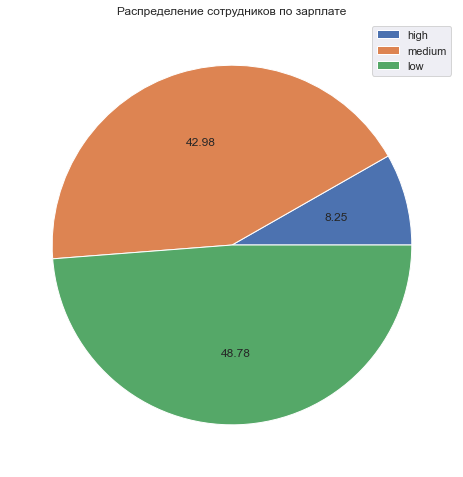

In [9]:
### расчитаем количество сотрудников каждого отдела
print((df.groupby('department').count().satisfaction_level))
### покажем распределение сотрудников по ЗП
### тот редкий случай, когда моно применить круговую диаграмму

plt.pie(df.groupby('salary').count().department.sort_values(),autopct='%.2f');
plt.title('Распределение сотрудников по зарплате');
plt.legend(df.groupby('salary').count().department.sort_values().index,loc="upper right");

In [10]:
### распределение по ЗП во всех отделах
df.groupby(['department','salary']).agg({'satisfaction_level':['count']}).unstack(level=0)

satisfaction_level                                             \
                        count                                              
department                 IT RandD accounting   hr management marketing   
salary                                                                     
high                       83    51         74   45        225        80   
low                       609   364        358  335        180       402   
medium                    535   372        335  359        225       376   

                                                
                                                
department product_mng sales support technical  
salary                                          
high                68   269     141       201  
low                451  2099    1146      1372  
medium             383  1772     942      1147

In [11]:
df_high = df[df['salary']=='high']
df_low = df[df['salary']=='low']

Pvalue Шапиро-Уилка: 5.605393417902312e-15
Pvalue Шапиро-Уилка: 7.019524397342306e-41


C:\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


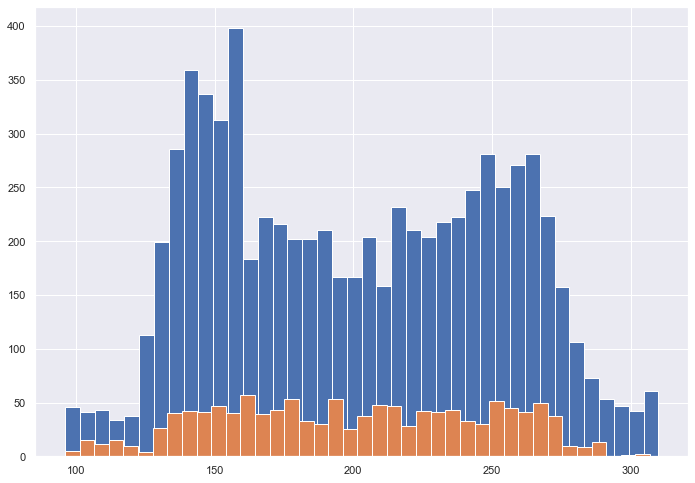

In [13]:
### проверим выборки на нормальное распределение 
print('Pvalue Шапиро-Уилка:',st.shapiro(df_high.average_montly_hours)[1])
print('Pvalue Шапиро-Уилка:',st.shapiro(df_low.average_montly_hours)[1])

### визуализируем распределения
df_low.average_montly_hours.hist(bins=40);
df_high.average_montly_hours.hist(bins=40);
### p-value слишком низок - вынуждены отвергнуть гипотезу о нормальном распределении выборок, значит будем применять тест Мана-Уитни

Количество часов, проводимых на работое между двумя группами с низким и высоким заработком статистически не различается


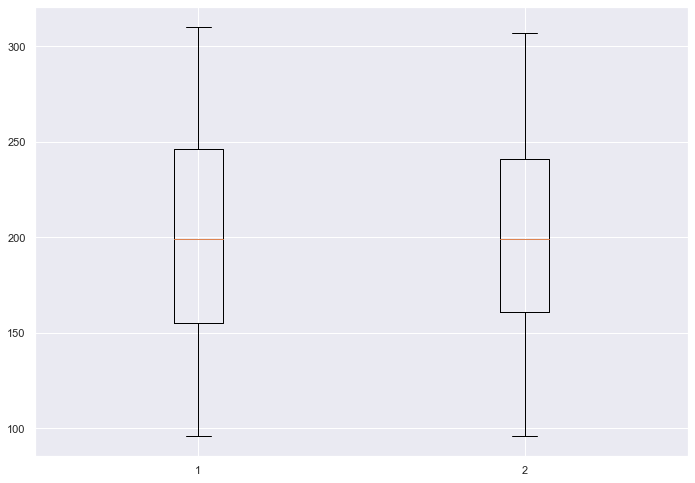

In [12]:
### Н0 - количество часов, проводимых на работое между двумя группами равно, Н1 - не равно 
s,p = st.mannwhitneyu(df_low.average_montly_hours,df_high.average_montly_hours)

if p>0.05:
    print('Количество часов, проводимых на работое между двумя группами с низким и высоким заработком статистически не различается')
else:
    print('Количество часов, проводимых на работое между двумя группами с низким и высоким заработком не равно')
    
### Визуализируем распределения
plt.boxplot([df_low.average_montly_hours,df_high.average_montly_hours]);
### на оснвоании теста мы не можем отвергнуть гипотезу Н0
### то есть выдвинутая в задании гипотеза,
###что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низкимокладом не подтверждается - разница статистически незначима


Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

In [13]:
df_left = df[df['left']==1]
df_not_left = df[df['left']==0]

In [14]:
### расчитаем долю сотрудников с повышением за последние 5 лет среди уволившихся
print(f'Среди уволившихся повышение за последние 5 лет имели {df_left.promotion_last_5years.value_counts()[1]} \
человек. Не имели повышения {df_left.promotion_last_5years.value_counts()[0]} человек')


### расчитаем долю сотрудников с повышением за последние 5 лет среди оставшихся
print(f'Среди оставшихся повышение за последние 5 лет имели {df_not_left.promotion_last_5years.value_counts()[1]} \
человек. Не имели повышения {df_not_left.promotion_last_5years.value_counts()[0]} человек')

### расчитаем среднюю степень удовлетворенности и среднее количество проектов среди уволившихся и не уволившихся
df.groupby('left').agg({'satisfaction_level':'mean','number_project': 'mean'})

Среди уволившихся повышение за последние 5 лет имели 19 человек. Не имели повышения 3552 человек
Среди оставшихся повышение за последние 5 лет имели 300 человек. Не имели повышения 11128 человек


,satisfaction_level,number_project
left,,
0,0.666810,3.786664
1,0.440098,3.855503


In [17]:
df_not_left.groupby('promotion_last_5years').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,department,salary
promotion_last_5years,,,,,,,,,
0,11128,11128,11128,11128,11128,11128,11128,11128,11128
1,300,300,300,300,300,300,300,300,300


In [15]:
### приведенные выше расчеты можно было бы представить и в таком виде, но это менее читаемо
### раскоментить unstack(level=-1) для еще одного варианта группировки 
df.groupby(['left','promotion_last_5years'])\
    .agg({"satisfaction_level":"mean","number_project":"mean","promotion_last_5years":"count"})#.unstack(level=-1)

satisfaction_level  number_project  \
left promotion_last_5years                                       
0    0                                0.666766        3.786395   
     1                                0.668433        3.796667   
1    0                                0.439992        3.859797   
     1                                0.460000        3.052632   

                            promotion_last_5years  
left promotion_last_5years                         
0    0                                      11128  
     1                                        300  
1    0                                       3552  
     1                                         19

In [16]:
### подготовим данные для построения модели LDA, исключим из основного датасета категории по увольнению и внесем их в отдельный датасет
data=df[['satisfaction_level','last_evaluation','number_project','average_montly_hours',\
         'time_spend_company','Work_accident','promotion_last_5years']]
data_left = df.left

In [21]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(data,  data_left, test_size=0.25, random_state=42)
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)

### проверим точность модели
score = logisticRegr.score(X_test, y_test)
print(score)

0.7581333333333333


C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
print(accuracy_score(y_test, logisticRegr.predict(X_test)))

0.7581333333333333


In [26]:
result = pd.DataFrame([y_test.reset_index().left, logisticRegr.predict(X_test)]).T.rename(columns = {'Unnamed 0' : 'Predict'})
result[(result['left']==0)&(result['Predict']!=0)|(result['left']==1)&(result['Predict']!=1)].head(20)

,left,Predict
3,1,0
7,0,1
9,0,1
10,1,0
14,1,0
21,1,0
24,1,0
25,1,0
26,1,0
30,1,0


In [25]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
print(cm)
cm = pd.DataFrame(cm,columns=['Предсказано неувольнение','Предсказано увольнение'],index=['Неувольнение', 'увольнение'])
cm

[[2627  226]
 [ 681  216]]


,Предсказано неувольнение,Предсказано увольнение
Неувольнение,2627,226
увольнение,681,216
